# Algortimo de Shor


## 1. Shor clásico


In [2]:
import math
import random


def classic_find_period(a: int, N: int) -> int:
    r = 1
    while True:  # r es el periodo que buscamos
        r += 1
        if (a ** r) % N == 1:
            break
    return r


def classic_shor_algorithm(N) -> tuple:
    assert (N > 0)  # Evitamos así números negativos y el cero
    assert (int(N) == N)  # Nos aseguramos que es entero positivo
    while True:  # Un loop infinito hasta que se encuentre los factores
        a = random.randint(0, N-1)
        g = math.gcd(a, N)
        if g != 1 or N == 1:  # Si g
            first_factor = g
            second_factor = (N/g)
            return int(first_factor), int(second_factor)
        else:
            r = classic_find_period(a, N)
            if r % 2 != 0:  # Si r es par se repite
                continue
            # También si a^(r/2) es congruente a -1 en mod N, se repite
            elif a ** (r/2) % N == -1 % N:
                continue
            else:
                first_factor = math.gcd(a**int(r/2)+1, N)
                second_factor = math.gcd(a**int(r/2)-1, N)
                if first_factor == N or second_factor == N:  # Si el factor es igual N, significa que es primo
                    continue
                return int(first_factor), int(second_factor)


classic_shor_algorithm(15)

(3, 5)

## 2. Shor cuántico


### Para esta descomposición se utilizará números pequeños como 15


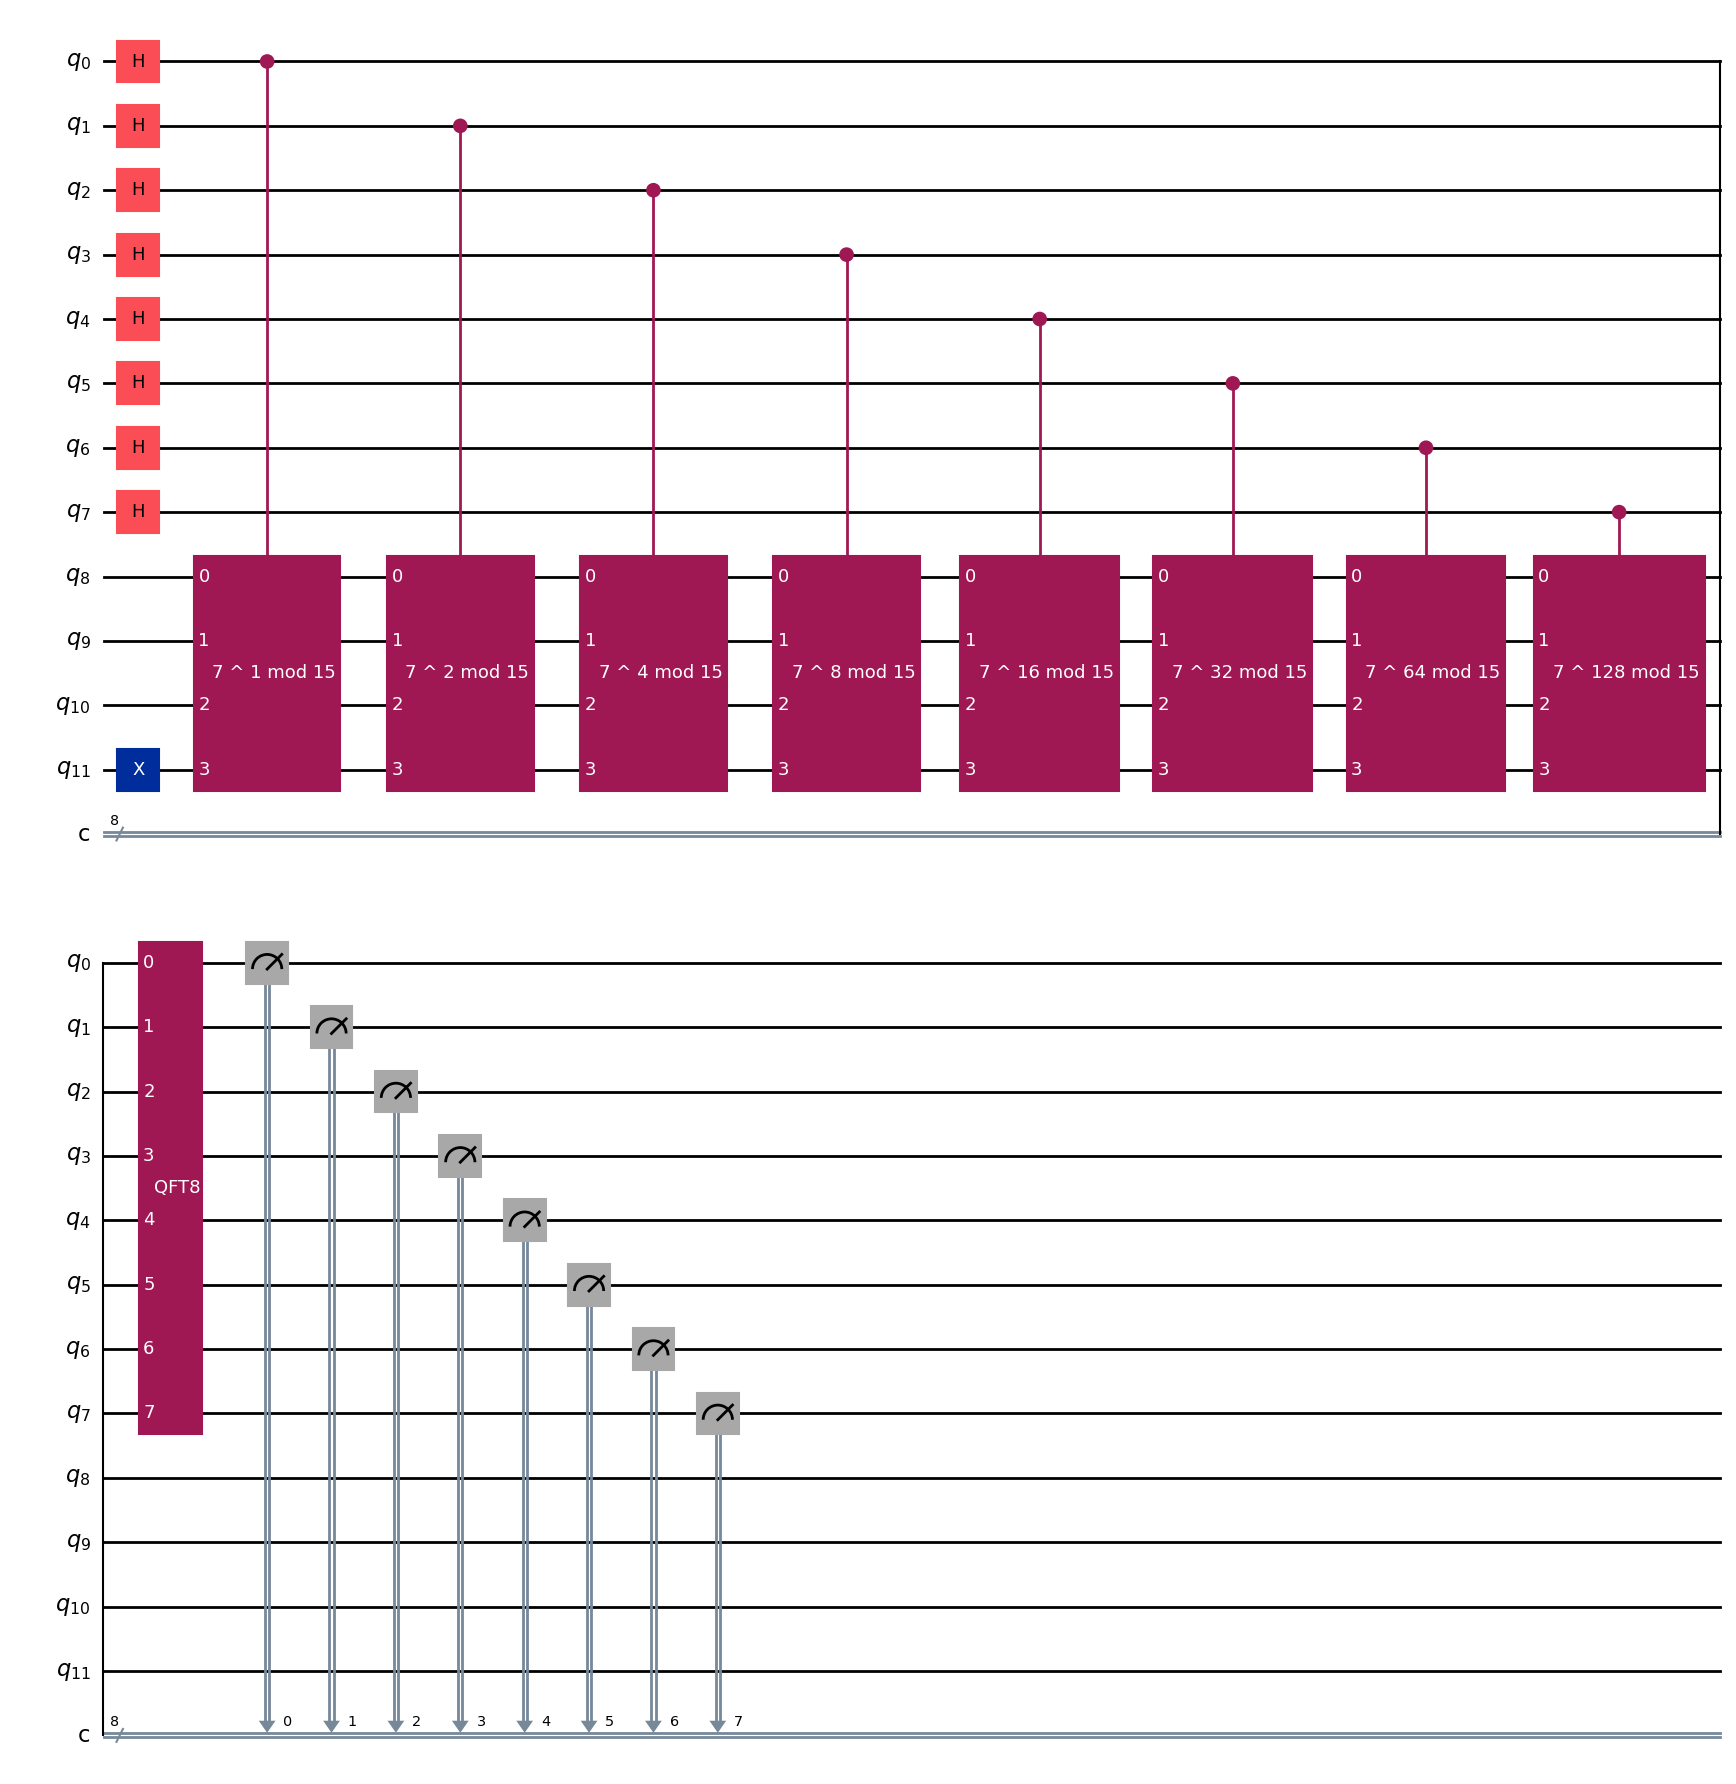

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from function_helper import QFT, c_amod15
from qiskit_ibm_runtime import SamplerV2

backend = AerSimulator()
sampler = SamplerV2(mode=backend)

# A continuación el circuito para la descomposición del número 15
n_count = 8
a = 7
qc = QuantumCircuit(n_count + 4, n_count)
for q in range(n_count):
    qc.h(q)

qc.x(3+n_count)

# Se añade la puerta c_amod15
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q]+[i + n_count for i in range(4)])

# Se añade la QFT
qc.append(QFT(n_count), range(n_count))
qc.measure(range(n_count), range(n_count))
qc.draw('mpl')

### Ahora un simulador de circuitos para ver los resultados


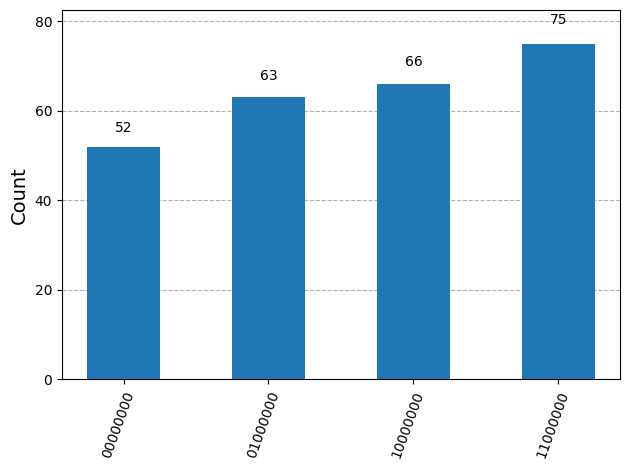

In [4]:
qc_aer_simulator = transpile(qc, backend=backend, optimization_level=1)
job = sampler.run([qc_aer_simulator], shots=256)

result = job.result()[0].data
counts = result.c.get_counts()
counts = dict(sorted(counts.items()))
plot_histogram(counts)

In [ ]:
N = 15
values_binary_list = list(counts.keys())
values_decimal_list = [int(values_binary_list[i], base=2) for i in range(0, len(values_binary_list))]
temp_list = values_decimal_list.copy()
temp_list.remove(0)
y = min(temp_list)
r = y//N  # Ahora ya tenemos el perido
first_factor = math.gcd(a**(int(r/2))+1, N)
second_factor = math.gcd(a**(int(r/2))-1, N)
print(f'Los factores primos de {N} son: {first_factor} y {second_factor}')

Los factores primos de 15 son: 5 y 3


[0, 64, 128, 192]
[52, 63, 66, 75]


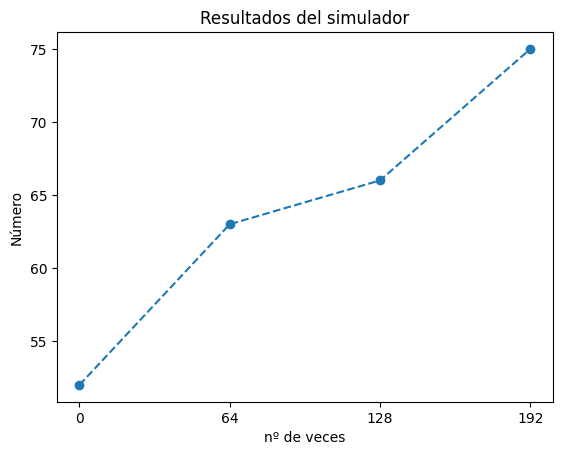

In [6]:
import matplotlib.pyplot as plt

counts_list = list(counts.values())
print(values_decimal_list)
print(counts_list)

plt.plot(values_decimal_list, counts_list, '--o')
plt.title('Resultados del simulador')
plt.xlabel('nº de veces')
plt.xticks([0, 64, 128, 192])
plt.ylabel('Número')
plt.show()

## Exportación de los datos


In [7]:
import pandas as pd

df = pd.DataFrame({'Número': values_decimal_list, 'Frecuencia': counts_list})

In [8]:
with pd.ExcelWriter('Simulador.xlsx') as writer:

    df.to_excel(writer,
                sheet_name='Simulador', index=False)